In [2]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestRegressor
import os
from sklearn import svm
from sklearn import datasets
from sklearn.svm import SVR 
from docx import Document
from docx.shared import Inches

In [3]:
# Projektas
# Elektros energijos suvartojimo prognozė, atsižvelgiant į oro sąlygas
# Užduotis:
# Sukurti ir pateikti modelius, skirtus prognozuoti elektros energijos suvartojimą 24-rioms valandoms į
# priekį, atsižvelgiant į (prognozuojamas) oro sąlygas. Modeliams pateikus tikėtinas ateities oro sąlygas,
# modeliai turi pateikti 24-rių valandų energijos poreikio įvertinimą. Pradiniai testiniai duomenys: bet kuri
# diena tarp 2023-čių rugpjūčio 01 ir spalio 30-tos dienos. Vėliau išbandykite suprognozuoti elektros
# vartojimą realiai sekančiai dienai, ir palyginkite su Nordpool duomenimsi.prognoze.
# Istoriniai orų duomenys pasiekiami čia: https://archyvas.meteo.lt/
# Bendras LT energijos suvartojimas kas valandą pasiekiamas čia:
# https://data.nordpoolgroup.com/auction/day-ahead/volumes?deliveryDate=2025-01-
# 09&deliveryAreas=LT,AT
# Prognozuojami orai pasiekiami per meteo.lt API.
# Pritaikykite DecisionTreeRegressor, LinearRegressor, SupportVectorMachine, RandomForestRegressor.
# Papildomas punktas : SupportVectorMachine palaiko skirtingus kernel’ius duomenų fitinimui – linear,

# poly, rbf. Plačiau čia: https://www.geeksforgeeks.org/support-vector-regression-svr-using-linear-and-non-
# linear-kernels-in-scikit-learn/

# Išrinkite geriausią kernel’į SVR modeliui ir SVR modelio prognozes pateikite tik su geriausiu kernel’iu.
# Prieš pateikdami modelius, nustatykite, kokie parametrai turi daugiausiai įtakos prognozei (hint –
# koreliacijos matrica ir heatmap vizualizacija). Su pairplot pateikite atsirinktų parametrų tarpusavio
# priklausomybes.
# Pateikdami modelių prognozes, arba ieškodami geriausio modelio, geriausio kernel’io, taip pat pateikite
# jų įvertinimus (vidurkiai, standartiniai nuokrypiai, etc ... ).
# Pateikite modelių prognozes vizualizuodami jas.
# Papildomi reikalavimai:
# Sugeneruoti grafikai (vizualizacijos) turi būti automatiškai saugomi į projekto aplanką bei automatiškai
# dedami į docx failą.
# Matplotlib’o figūra gali būti saugojama į PNG su komanda .savefig().
# Plačiau čia: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
# Docx failo generavimas https://python-docx.readthedocs.io/en/latest/
# Duotoje nuorodoje pateikiamas minimalus veikiantis pavyzdys, kuriame sukuriamas Word docx
# dokumentas, į jį įterpiamas tekstas, paveikslai.

# Užduotis - paskaičiuoti geriausio modelio spėjimo įverčius (R2 score, etc), lyginannt spėjimą su NordPool
# faktu.

# Užduotis - parašyti skriptą, kuris pateiktų prognozę tiesiog skaičiuodamas vidutines vertes (pagal vidurkius)
# Palyginkite šio skripto prognozės tikslumą su dviem savo geriausiais modeliais 
# (pagal koreliacijos koef, R2 score, MAE, MSE, RMSE ...)

In [4]:
def linear_regression(X_train, y_train, X_test, y_test, xpred):
    fit = LinearRegression().fit(X_train, y_train)
    pred = fit.predict(X_test)
    fit.score(X_test, y_test)*100.0
    pred = fit.predict(xpred)
    return pred

In [5]:
def random_forrest(X_train, y_train, X_test, y_test, xpred):
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    # print(f'Mean Absolute Percentage Error: {mape}%')
    pred = rf.predict(xpred)
    return pred

In [6]:
def decision_tree_regressor(X_train, y_train, X_test, y_test, xpred):
    dt_regressor = DecisionTreeRegressor(random_state=35)
    dt_regressor.fit(X_train, y_train)
    y_pred = dt_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    # print(f'Mean Absolute Percentage Error: {mape}%')
    pred = dt_regressor.predict(xpred)
    return pred

In [7]:
df1 = pd.read_excel(r"C:\Users\pauli\Downloads\b2c_gv_vartojimas.xlsx")
df_o1 = pd.read_csv(r"C:\Users\pauli\Downloads\orai_801_1030.csv")

In [8]:
df12 = pd.read_excel(r"C:\Users\pauli\Downloads\2025-01-12-NORDPOOLMWh.ods", header = 1)
df_o12 = pd.read_csv(r"C:\Users\pauli\Downloads\orai_0112.csv")

In [9]:
df_o1['cloud_cover'] = df_o1['cloud_cover'].fillna(100.0)
df_o1['condition_code_1'] = LabelEncoder().fit_transform(df_o1['condition_code'])
condition_code = dict(zip(df_o1['condition_code'], df_o1['condition_code_1']))
print(condition_code)
df_o1['obs_time_utc'] = pd.to_datetime(df_o1['obs_time_utc'])
df_o1.rename(columns={'obs_time_utc': 'dateTime'}, inplace=True)
df_o1.drop('condition_code', axis=1, inplace=True)

{'partly-cloudy': 10, 'variable-cloudiness': 17, 'cloudy': 1, 'clear': 0, 'cloudy-with-sunny-intervals': 2, 'light-rain': 6, 'rain': 11, 'heavy-rain': 5, 'thunderstorms': 16, 'light-rain-at-times': 7, 'thunder': 15, 'mist': 9, 'rain-at-times': 12, 'rain-showers': 13, 'fog': 3, 'hail': 4, 'light-sleet': 8, 'sleet': 14}


In [10]:
df1['viso'] = df1.iloc[:, 1:].sum(axis=1)
df1=df1[['dateTime', 'viso']].copy()
df1['valanda']=df1['dateTime'].dt.hour
df1['diena']=df1['dateTime'].dt.day
df1['menuo']=df1['dateTime'].dt.month
df1['sav_diena']=df1['dateTime'].dt.weekday

In [11]:
df1 = pd.merge(df1, df_o1, on='dateTime', how='left')


In [12]:
df1_1031=df1[-25:-1].copy()
df1=df1[:-25]

In [13]:
Xmok= df1.drop(columns=['dateTime', 'viso'])
y=df1['viso']
xpred = df1_1031.drop(columns=['dateTime', 'viso'])
X_train, X_test, y_train, y_test = train_test_split(Xmok, y, test_size=0.1, random_state=30)

In [14]:
df1_ats=df1_1031
df1_ats['Linear'] = linear_regression(X_train, y_train, X_test, y_test, xpred)
df1_ats['RandomForest']= random_forrest(X_train, y_train, X_test, y_test, xpred)
df1_ats['DecisionTree']= decision_tree_regressor(X_train, y_train, X_test, y_test, xpred)

Mean Squared Error: 9314.592070140568


In [15]:
xpred.columns

Index(['valanda', 'diena', 'menuo', 'sav_diena', 'air_temperature',
       'feels_like_temperature', 'wind_speed', 'wind_gust', 'wind_direction',
       'cloud_cover', 'sea_level_pressure', 'relative_humidity',
       'precipitation', 'condition_code_1'],
      dtype='object')

In [16]:
df_o12['cloud_cover'] = df_o12['cloud_cover'].fillna(100.0)
df_o12['condition_code_1'] = LabelEncoder().fit_transform(df_o12['condition_code'])
condition_code = dict(zip(df_o12['condition_code'], df_o1['condition_code_1']))
print(condition_code)
df_o12['obs_time_utc'] = pd.to_datetime(df_o12['obs_time_utc'])
df_o12.rename(columns={'obs_time_utc': 'dateTime'}, inplace=True)
df_o12.drop('condition_code', axis=1, inplace=True)
df_o12['valanda']=df_o12['dateTime'].dt.hour

{'cloudy': 1, 'snow-showers': 6, 'light-snow': 11, 'light-sleet': 1, 'snow': 11}


In [17]:
df_12oras=pd.DataFrame()
df_12oras['valanda']= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
df_12oras['diena']= [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
df_12oras['menuo']= [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
df_12oras['sav_diena']= [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


In [18]:
df_pred12 = pd.merge(df_12oras, df_o12, on='valanda',how='left')
df_pred12.drop('dateTime', axis=1, inplace=True)

In [19]:
df12ats=pd.DataFrame()
df12ats['Linear'] = linear_regression(X_train, y_train, X_test, y_test, df_pred12)
df12ats['RandomForest']= random_forrest(X_train, y_train, X_test, y_test, df_pred12)
df12ats['DecisionTree']= decision_tree_regressor(X_train, y_train, X_test, y_test, df_pred12)

Mean Squared Error: 9314.592070140568


In [20]:
df12ats['valanda']=df_12oras['valanda']

In [21]:
df12['valanda']= df12['Laikas'].apply(lambda x: int(str(x).split(':')[0]))

In [22]:
df12ats = pd.merge(df12ats, df12, on='valanda',how='left')

In [23]:
df12ats.head(30)

,Linear,RandomForest,DecisionTree,valanda,Laikas,MWH
0,380.746653,722.503147,738.302165,0,00:00-01:00,1271.5
1,422.847112,722.656758,738.302165,1,01:00-02:00,1274.8
2,419.150902,720.443644,738.302165,2,02:00-03:00,1243.3
3,452.764856,732.765250,738.302165,3,03:00-04:00,1223.8
4,394.986966,730.177352,738.302165,4,04:00-05:00,1219.3
5,413.730206,735.117667,738.302165,5,05:00-06:00,1239.5
6,493.476572,942.979318,918.823800,6,06:00-07:00,1295.0
7,402.354905,935.863322,935.890765,7,07:00-08:00,1368.0
8,412.639095,937.837110,935.890765,8,08:00-09:00,1439.5
9,435.877979,738.835470,408.481299,9,09:00-10:00,1532.0


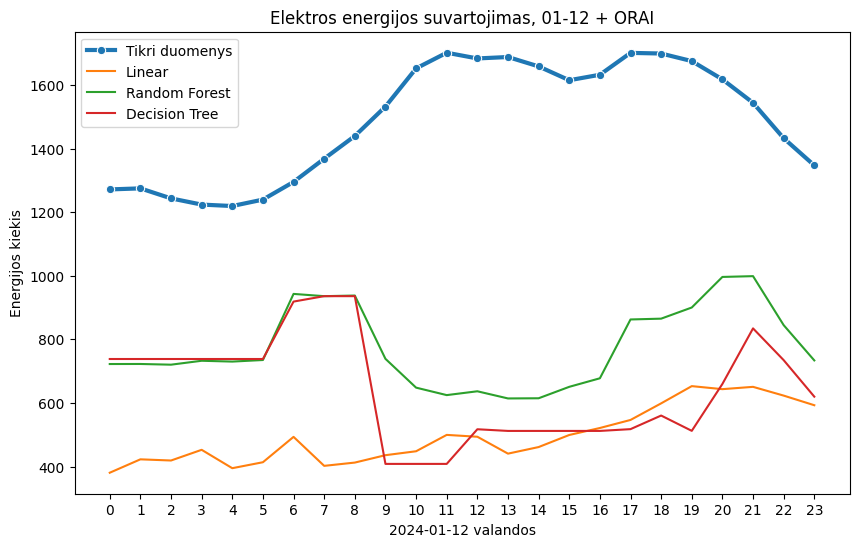

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df12ats, x='valanda', y='MWH', label='Tikri duomenys', marker='o', linewidth=3)
sns.lineplot(data=df12ats, x='valanda', y='Linear', label='Linear')
sns.lineplot(data=df12ats, x='valanda', y='RandomForest', label='Random Forest')
sns.lineplot(data=df12ats, x='valanda', y='DecisionTree', label='Decision Tree')
plt.title('Elektros energijos suvartojimas, 01-12 + ORAI')
plt.ylabel('Energijos kiekis')
plt.xlabel('2024-01-12 valandos')
plt.xticks(df12ats['valanda'], df12ats['valanda'])
# plt.xticks(rotation=0)
# plt.savefig('example_plot.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

In [25]:
# document = Document()

# document.add_heading('Document Title', 0)

# p = document.add_paragraph('A plain paragraph having some ')
# p.add_run('bold').bold = True
# p.add_run(' and some ')
# p.add_run('italic.').italic = True

# document.add_heading('Heading, level 1', level=1)
# document.add_paragraph('Intense quote', style='Intense Quote')

# document.add_paragraph(
#     'first item in unordered list', style='List Bullet'
# )
# document.add_paragraph(
#     'first item in ordered list', style='List Number'
# )

# document.add_picture('example_plot.png', width=Inches(1.25))

# records = (
#     (3, '101', 'Spam'),
#     (7, '422', 'Eggs'),
#     (4, '631', 'Spam, spam, eggs, and spam')
# )

# table = document.add_table(rows=1, cols=3)
# hdr_cells = table.rows[0].cells
# hdr_cells[0].text = 'Qty'
# hdr_cells[1].text = 'Id'
# hdr_cells[2].text = 'Desc'
# for qty, id, desc in records:
#     row_cells = table.add_row().cells
#     row_cells[0].text = str(qty)
#     row_cells[1].text = id
#     row_cells[2].text = desc

# document.add_page_break()

# document.save('demo.docx')

In [26]:
a = ([1,2,3],[4,5,6])
print(a)
a[0][1]='A'
print(a)

([1, 2, 3], [4, 5, 6])
([1, 'A', 3], [4, 5, 6])
